In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from util import where, where_eq

In [2]:
data_epoch = pd.read_csv('epoch_photometry_data.csv')
data_source = pd.read_csv('jobresult03_parallax_filter.csv')
source_ids = data_epoch['source_id'].unique()

In [3]:
def chi_square(source_id, band):
    if band not in ('G', 'BP', 'RP'):
        return
        
    time_data = where_eq('band', band, df=where_eq('source_id', source_id, df=data_epoch))
    mean_mag = where_eq('source_id', source_id, df=data_source)[f'phot_{band.lower()}_mean_mag']
    
    n = len(time_data)
    ret = 0
    c = 2.5 / np.log(10)
    
    for mag, flux, flux_error in zip(time_data['mag'], time_data['flux'], time_data['flux_error']):
        mag_error = c * flux_error/flux
        ret += (mag - mean_mag)**2 / mag_error**2
        
    return ret / (n-1)

In [4]:
k = [ float(chi_square(sid, 'G')) for sid in source_ids ]
k_rp = [ float(chi_square(sid, 'RP')) for sid in source_ids ]
k_bp = [ float(chi_square(sid, 'BP')) for sid in source_ids ]

In [5]:
chi_square_data = pd.DataFrame(zip(source_ids, k, k_rp, k_bp),
                               columns=['source_id', 'chi_square_g', 'chi_square_rp', 'chi_square_bp']
                              )
chi_square_data.to_csv('chi_square_data.csv')

In [12]:
def draw_light_curves(n, ind=True):
    if ind:
        s = where(data_epoch.source_id == source_ids[n])
    else:
        s = where_eq('source_id', n, df=data_epoch)
        
    s_g = where_eq('band', 'G', s, df=data_epoch)
    s_bp = where_eq('band', 'BP', s, df=data_epoch)
    s_rp = where_eq('band', 'RP', s, df=data_epoch)
    
    fig, ax = plt.subplots(3)
    
    ax[0].scatter(s_g.time, s_g.mag)
    ax[0].invert_yaxis()
    ax[0].set_yscale('log')
    
    ax[1].scatter(s_bp.time, s_bp.mag)
    ax[1].invert_yaxis()
    ax[1].set_yscale('log')
    
    ax[2].scatter(s_rp.time, s_rp.mag)
    ax[2].invert_yaxis()
    ax[2].set_yscale('log')

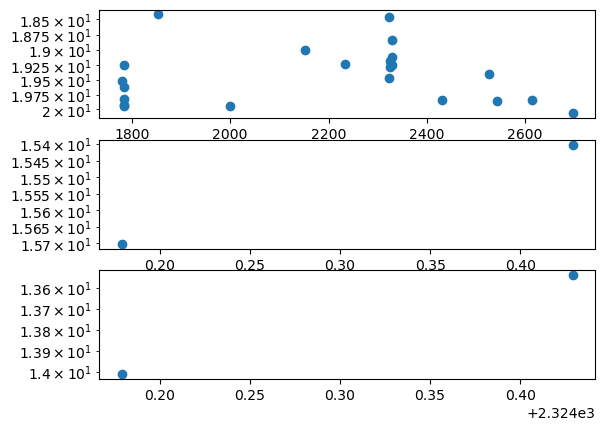

In [14]:
draw_light_curves(385764071218208256, ind=False)

In [9]:
variables = where_eq('phot_variable_flag', 'VARIABLE', df=data_source)
variables

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,astrometric_params_solved,...,pseudocolour_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,ecl_lat,nu_eff_used_in_astrometry
1,385497744590070912,3.992995,43.658760,1.101956,1.387515,-0.792380,1.609943,1.704215,1.571880,31,...,NaN,20.755340,20.900755,20.689070,0.211685,NaN,NaN,VARIABLE,37.832515,1.576564
21,385524824361687040,4.361768,44.097955,-1.445585,0.807520,-0.648387,0.667193,-0.451219,0.505398,95,...,0.160023,20.310585,20.029263,18.610626,1.418636,NaN,NaN,VARIABLE,38.078327,NaN
38,385623054556280832,5.814056,43.540757,0.353208,0.535477,-0.023378,0.461431,0.026728,0.296253,31,...,NaN,20.180584,20.426676,19.858768,0.567907,NaN,NaN,VARIABLE,37.071919,1.601674
105,385642467808657408,5.347761,43.848856,-0.074159,0.281066,0.133175,0.256687,-0.053446,0.178845,31,...,NaN,19.488178,19.699684,19.192700,0.506985,NaN,NaN,VARIABLE,37.506931,1.602413
114,383377817452439168,4.391577,40.469027,-0.075099,0.232419,-0.204254,0.169675,-0.122556,0.119110,31,...,NaN,19.014465,19.175568,18.708527,0.467041,NaN,NaN,VARIABLE,34.911324,1.613760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64460,376172855195389056,16.290599,43.122059,0.452777,1.124210,-0.316480,1.082918,-0.680965,0.705184,31,...,NaN,20.595167,21.013279,20.218985,0.794294,NaN,NaN,VARIABLE,33.072994,1.656227
64465,376174405678861824,16.154917,42.892601,0.280405,0.311497,-0.189487,0.232905,-0.165021,0.187309,31,...,NaN,19.334028,19.486862,18.929660,0.557201,NaN,NaN,VARIABLE,32.913889,1.617424
64470,376174710621088256,16.114344,42.936737,-0.424757,0.538106,-0.043898,0.453034,0.667781,0.352953,31,...,NaN,20.123993,20.246447,19.518406,0.728041,NaN,NaN,VARIABLE,32.966714,1.527595
64480,376177665558693632,16.097632,43.044860,0.095559,0.742431,-0.090890,0.872430,-0.119267,0.402555,95,...,0.125395,20.248884,19.800959,18.537216,1.263742,NaN,NaN,VARIABLE,33.068526,NaN


In [10]:
chi_square_data

,source_id,chi_square_g,chi_square_rp,chi_square_bp
0,383805836714177920,11.344171,3.597695,5.299525
1,385497744590070912,9.003312,2.309269,2.287948
2,385498225626420352,1.958113,6.581904,3.280803
3,385498294346907520,2.761481,4.725604,3.938151
4,385515989612893696,7.611866,9.596345,4.670326
...,...,...,...,...
64496,376181277625179904,1.714699,8.357478,4.033018
64497,376181307691031808,1.556267,9.715839,8.415178
64498,376181754367604096,7.054770,12.022176,4.595985
64499,376181994885798528,1.082537,6.416493,1.518102


In [38]:
where_eq('source_id', 376172855195389056, df=chi_square_data)

,source_id,chi_square_g,chi_square_rp,chi_square_bp
64460,376172855195389056,11.666372,10.970206,13.740214
